***Outlier analysis on Number of employees***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
visa_df=pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\DATA SCIENCE\\data files\\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


***Box plot***

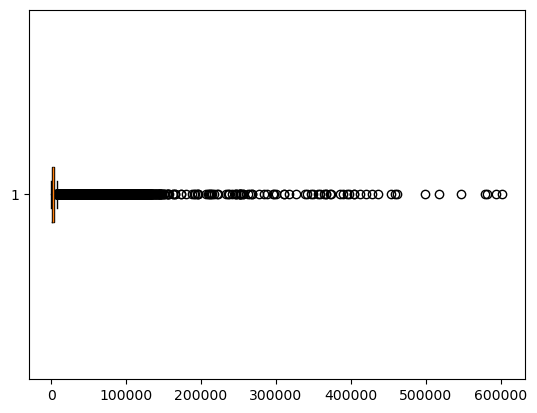

In [3]:
plt.boxplot(visa_df["no_of_employees"],vert=False)
plt.show()

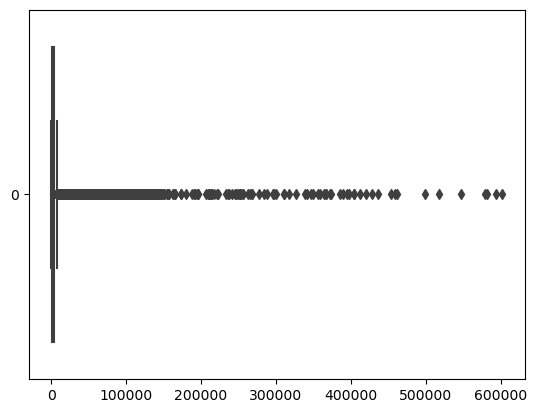

In [4]:
sns.boxplot(visa_df["no_of_employees"],orient="h")
plt.show()

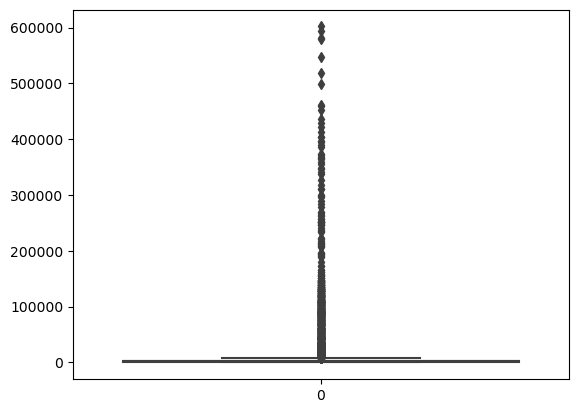

In [6]:
sns.boxplot(visa_df["no_of_employees"],orient="v")
plt.show()

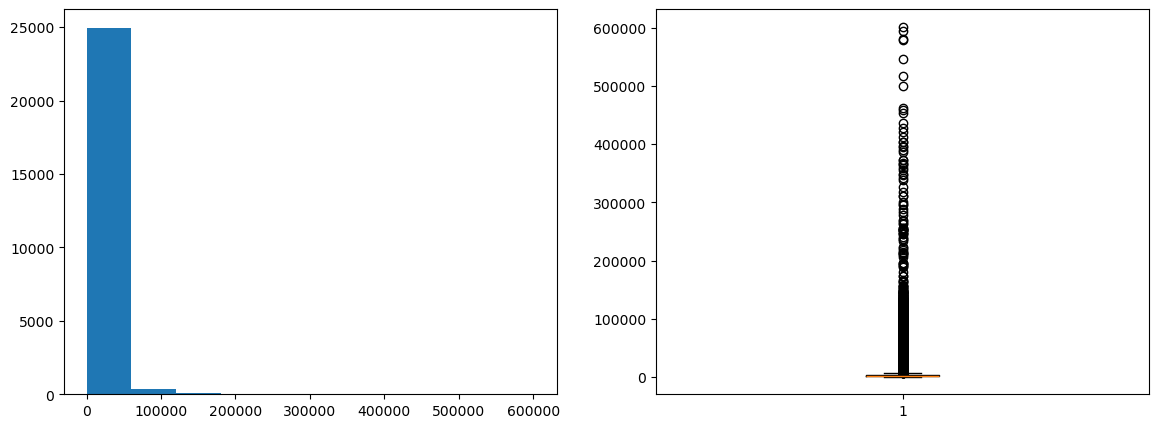

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df["no_of_employees"])
plt.subplot(1,2,2).boxplot(visa_df["no_of_employees"])
plt.show()


***Outliers data***

In [8]:
q1=np.percentile(visa_df["no_of_employees"],25)
q3=np.percentile(visa_df["no_of_employees"],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
con1=visa_df["no_of_employees"]<LB
con2=visa_df["no_of_employees"]>UB
outliers_data=visa_df[con1|con2]
len(outliers_data)


1556

***Non outliers data***

In [9]:
q1=np.percentile(visa_df["no_of_employees"],25)
q3=np.percentile(visa_df["no_of_employees"],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
con1=visa_df["no_of_employees"]>LB
con2=visa_df["no_of_employees"]<UB
non_outliers_data=visa_df[con1&con2]
len(non_outliers_data)

23924

In [10]:
1556+23924

25480

***Histogram and boxplot for non outliers data***

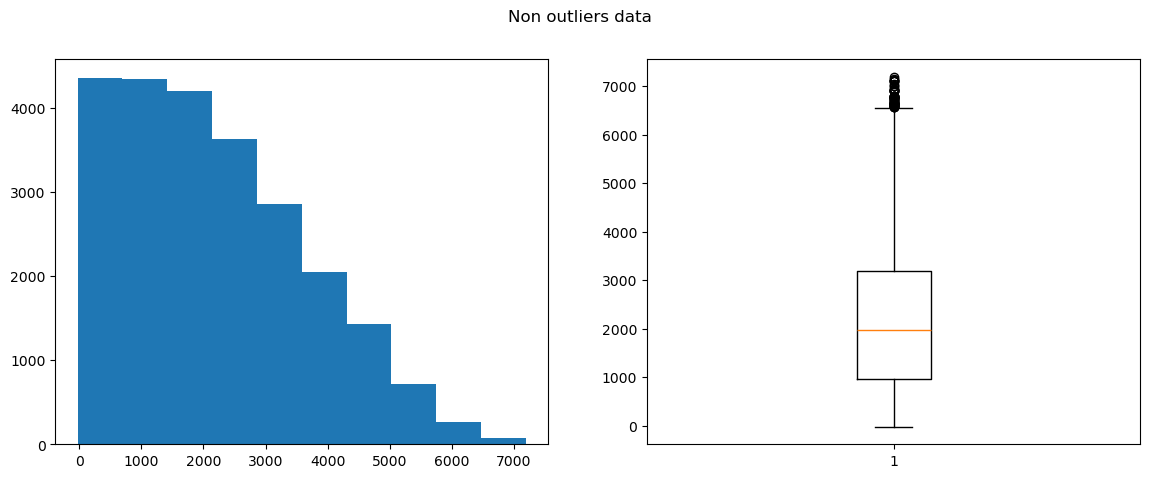

In [11]:
plt.figure(figsize=(14,5))
plt.suptitle("Non outliers data")
plt.subplot(1,2,1).hist(non_outliers_data["no_of_employees"])
plt.subplot(1,2,2).boxplot(non_outliers_data["no_of_employees"])
plt.show()


***Comparing Total data with non outliers of data***



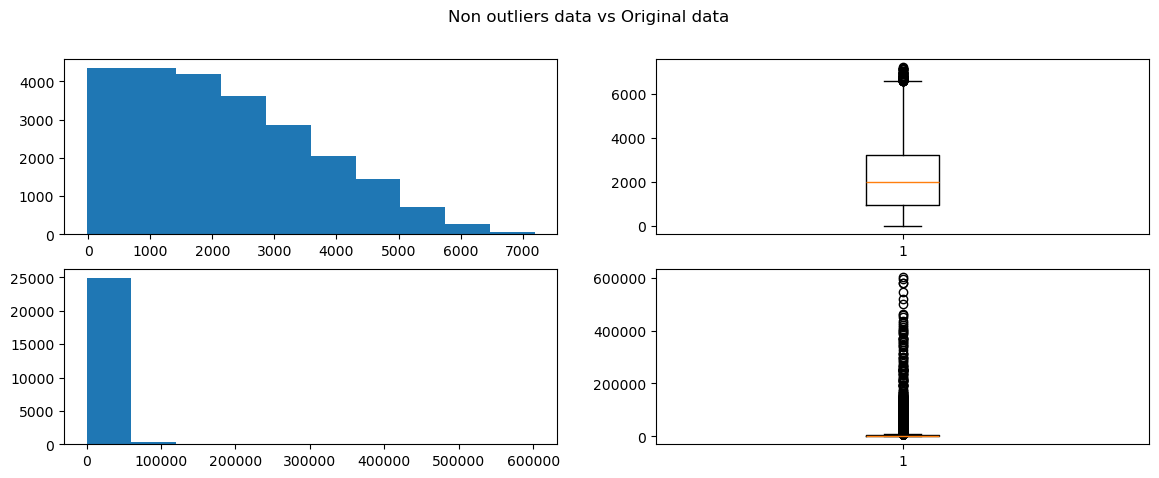

In [12]:
plt.figure(figsize=(14,5))
plt.suptitle("Non outliers data vs Original data")
plt.subplot(2,2,1).hist(non_outliers_data["no_of_employees"])   
plt.subplot(2,2,2).boxplot(non_outliers_data["no_of_employees"])  
plt.subplot(2,2,3).hist(visa_df["no_of_employees"])           
plt.subplot(2,2,4).boxplot(visa_df["no_of_employees"])          
plt.show()


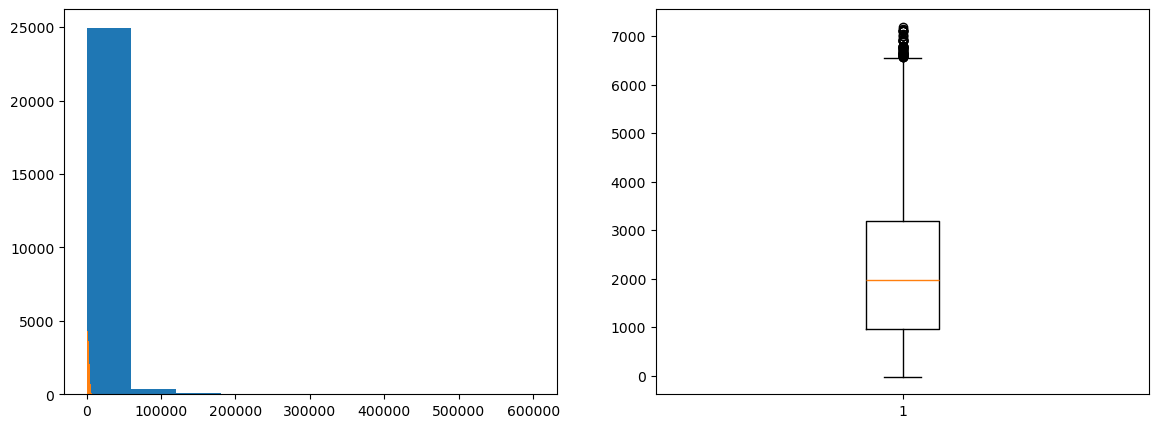

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df["no_of_employees"])
plt.subplot(1,2,1).hist(non_outliers_data["no_of_employees"])

plt.subplot(1,2,2).boxplot(non_outliers_data["no_of_employees"])
plt.show()

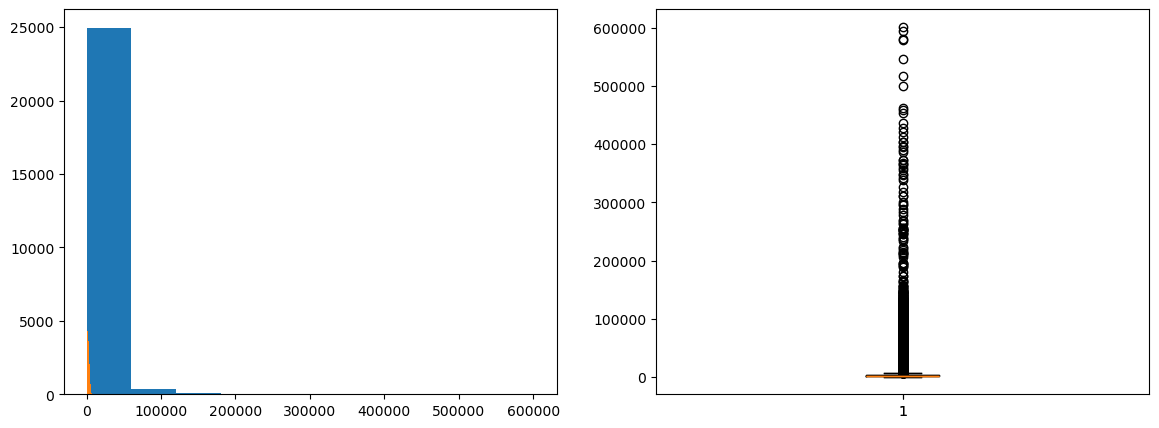

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df["no_of_employees"])
plt.subplot(1,2,1).hist(non_outliers_data["no_of_employees"])
plt.subplot(1,2,2).boxplot(visa_df["no_of_employees"])
plt.subplot(1,2,2).boxplot(non_outliers_data["no_of_employees"])
plt.show()

***Dealing with the outliers using fill with median method***

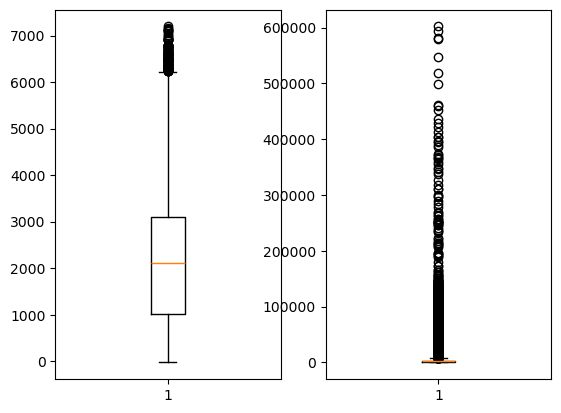

In [15]:
l1=[]
q1=round(np.percentile(visa_df["no_of_employees"],25),2)
q3=round(np.percentile(visa_df["no_of_employees"],75),2)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
median=visa_df["no_of_employees"].median()
for i in visa_df["no_of_employees"].values:
    if i < LB or i > UB:
       l1.append(median)
    else:
       l1.append(i)

visa_df_copy=visa_df.copy()
visa_df_copy["no_of_employees"]=l1
plt.subplot(1,2,1).boxplot(visa_df_copy["no_of_employees"])
plt.subplot(1,2,2).boxplot(visa_df["no_of_employees"])
plt.show()


***np.where***

In [16]:
con=visa_df["no_of_employees"]>20000
l1=np.where(con,1,visa_df["no_of_employees"])
l1

array([14513,  2412,     1, ...,  1121,  1918,  3195], dtype=int64)

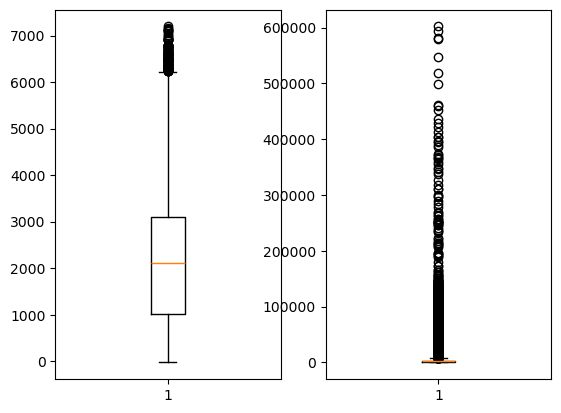

In [17]:
con1=visa_df["no_of_employees"]<LB 
con2=visa_df["no_of_employees"]>UB 
con=con1|con2
median=visa_df["no_of_employees"].median()
t=np.where(con,median,visa_df["no_of_employees"])
visa_df_copy=visa_df.copy()
visa_df_copy["no_of_employees"]=t
plt.subplot(1,2,1).boxplot(visa_df_copy["no_of_employees"])
plt.subplot(1,2,2).boxplot(visa_df["no_of_employees"])
plt.show()